3576


(array([  34.,   16.,   47.,   54.,  226.,  473., 1046., 1303.,  357.,
          20.]),
 array([-4.20074109, -3.26200977, -2.32327845, -1.38454712, -0.4458158 ,
         0.49291552,  1.43164684,  2.37037817,  3.30910949,  4.24784081,
         5.18657213]),
 <a list of 10 Patch objects>)

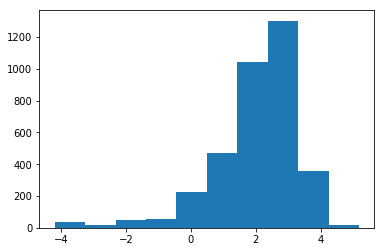

In [40]:
import csv
import math
import re
import operator
from collections import defaultdict
data_list = []
with open('all sephora.csv',mode = 'r') as csv_file:
    all_data = csv.DictReader(csv_file)
    for row in all_data:
        data_list.append(row)
# print (data_list[0])
real_score = defaultdict(int)
review_count = defaultdict(int)
for row in data_list:
    real_score[row['ProductId']] += (int(row['Rating'])-3)*(math.log(10+len(re.sub("[^\w]", " ", row['ReviewText']).split()),10))
    review_count[row['ProductId']] += 1
real_rating = {}
for key, value in real_score.items():
    real_rating[key]=real_score[key]/review_count[key]
#print (sorted(real_rating.items(), key=operator.itemgetter(1))[-10:])
print (len(real_rating))
scores = [v for k,v in real_rating.items()]
import matplotlib
matplotlib.pyplot.hist(scores,bins=10)